In [1]:
import pandas as pd
import numpy as np
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sqlalchemy import create_engine
import joblib


: 

## Reading Datasets


In [2]:
df_data_2015 = pd.read_csv( 'data/2015.csv')
df_data_2016 = pd.read_csv('data/2016.csv')
df_data_2017 = pd.read_csv('data/2017.csv')
df_data_2018 = pd.read_csv('data/2018.csv')
df_data_2019 = pd.read_csv('data/2019.csv')

In [9]:

df_data_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
df_data_2016

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [6]:
df_data_2017

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [7]:
df_data_2018

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [8]:
df_data_2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [4]:
archivos = ["Data/2015.csv","Data/2016.csv","Data/2017.csv","Data/2018.csv","Data/2019.csv"]

dataframes = []
position=0
for archivo in archivos:
    anio = archivo.split("/")[-1].split(".")[0]
    df = pd.read_csv(archivo)
    df['anio']=anio
     # Eliminar columnas no deseadas
    columns_to_drop = [
        "Region",
        "Standard Error",
        "Lower Confidence Interval",
        "Upper Confidence Interval",
        "Dystopia Residual",
        "Whisker.high",
        "Whisker.low",
        "Dystopia.Residual"
    ]
    df = df.drop(columns=columns_to_drop, errors='ignore')
    position+=1


    df = df.rename(columns={
        'Happiness.Rank': 'Happiness Rank',
        'Overall rank': 'Happiness Rank',
        'Country or region': 'Country',
        'Score': 'score',
        'Happiness Score': 'score',
        'Happiness.Score': 'score',
        'Economy (GDP per Capita)': 'gdp',
        'GDP per capita': 'gdp',
        'Economy..GDP.per.Capita.': 'gdp',
        'Family': 'Social support',
        'Healthy life expectancy' : 'healthy_life_expectancy',
        'Health (Life Expectancy)': 'healthy_life_expectancy',
        'Health..Life.Expectancy.': 'healthy_life_expectancy',
        'Freedom to make life choices': 'freedom',
        'Freedom': 'freedom',
        'Generosity': 'generosity',
        'Perceptions of corruption': 'corruption',
        'Trust (Government Corruption)': 'corruption',
        'Trust..Government.Corruption.': 'corruption'
    })
    dataframes.append(df)

df = pd.concat(dataframes, ignore_index=True)
df

,Country,Happiness Rank,score,gdp,Social support,healthy_life_expectancy,freedom,corruption,generosity,anio
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
778,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
779,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
780,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


In [21]:
df

,Country,Happiness Rank,score,gdp,Social support,healthy_life_expectancy,freedom,corruption,generosity,anio
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
778,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
779,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
780,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


# Analisis Exploratorio De Los Datos
## ¿Qué tipo de dato son las variables del conjunto de datos?

In [5]:
df.dtypes

Country                     object
Happiness Rank               int64
score                      float64
gdp                        float64
Social support             float64
healthy_life_expectancy    float64
freedom                    float64
corruption                 float64
generosity                 float64
anio                        object
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [6]:
(
    df
    .dtypes
    .value_counts()
)

float64    7
object     2
int64      1
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [7]:
df.shape

(782, 10)

## ¿Existen valores nulos explicitos en el conjunto de datos?

In [8]:
(   df
    .isnull()
    .any()
)

Country                    False
Happiness Rank             False
score                      False
gdp                        False
Social support             False
healthy_life_expectancy    False
freedom                    False
corruption                  True
generosity                 False
anio                       False
dtype: bool

### De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [5]:
(
    df
    .isnull()
    .sum()
    .sort_values(ascending=False)
)


corruption                 1
Country                    0
Happiness Rank             0
score                      0
gdp                        0
Social support             0
healthy_life_expectancy    0
freedom                    0
generosity                 0
anio                       0
dtype: int64

### ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [9]:
(
    df
    .isnull()
    .sum()
    .sum()
)

1

### Traemos el Registro Nulo

In [10]:
nulos_registers=df[df.isnull().any(axis=1)]
nulos_registers


,Country,Happiness Rank,score,gdp,Social support,healthy_life_expectancy,freedom,corruption,generosity,anio
489,United Arab Emirates,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186,2018


In [11]:
df=df.dropna()
df

,Country,Happiness Rank,score,gdp,Social support,healthy_life_expectancy,freedom,corruption,generosity,anio
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
778,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
779,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
780,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


## Cuantos Duplicados 

In [12]:
cantidad_duplicados = df.duplicated().sum()
cantidad_duplicados

0

# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [27]:
df.describe(include='all')

,Country,Happiness Rank,score,gdp,Social support,healthy_life_expectancy,freedom,corruption,generosity,anio
count,782,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000,782
unique,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
freq,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158
mean,NaN,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576,NaN
std,NaN,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.105816,0.122321,NaN
min,NaN,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.054000,0.130000,NaN
50%,NaN,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982,NaN
75%,NaN,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.156030,0.278832,NaN


### Solo las numéricas

In [28]:
df.describe(include=[np.number])

,Happiness Rank,score,gdp,Social support,healthy_life_expectancy,freedom,corruption,generosity
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.105816,0.122321
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.054000,0.130000
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.156030,0.278832
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075


### Solo categóricas - 1

In [29]:
df.describe(include=object)

,Country,anio
count,782,782
unique,170,5
top,Switzerland,2015
freq,5,158


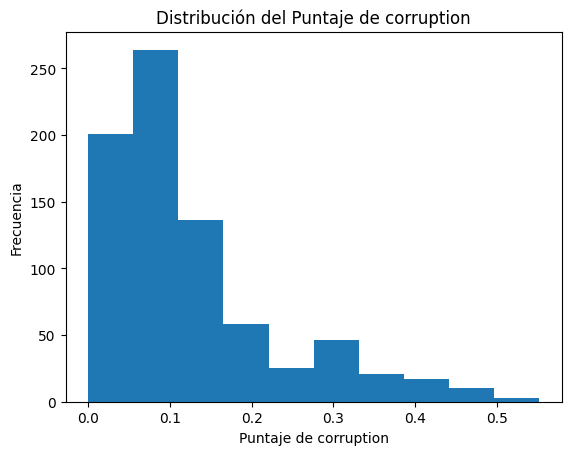

In [46]:
# Ejemplo de histograma
plt.hist(df['corruption'])
plt.xlabel('Puntaje de corruption')
plt.ylabel('Frecuencia')
plt.title('Distribución del Puntaje de corruption')
plt.show()

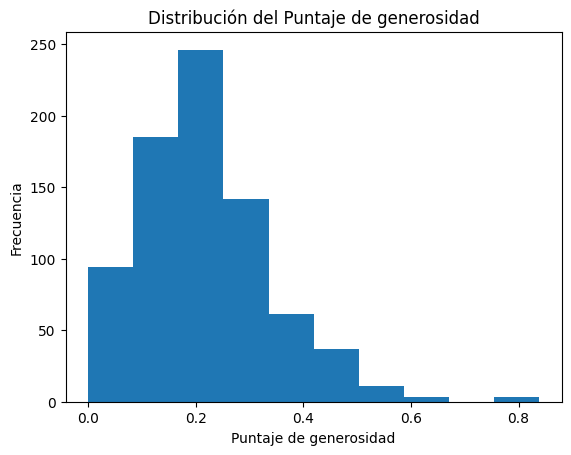

In [45]:
# Ejemplo de histograma
plt.hist(df['generosity'])
plt.xlabel('Puntaje de generosidad')
plt.ylabel('Frecuencia')
plt.title('Distribución del Puntaje de generosidad')
plt.show()

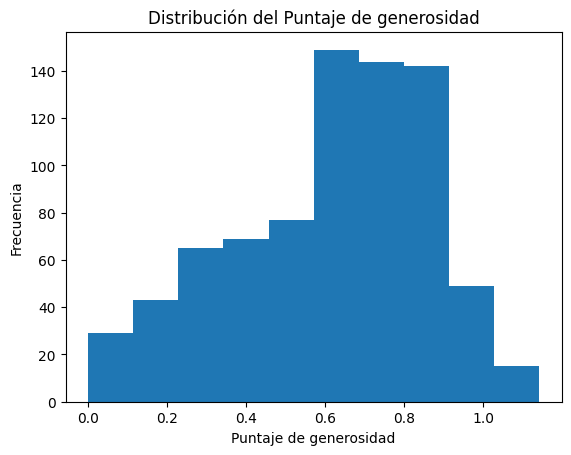

In [47]:
#score	gdp	Social support	healthy_life_expectancy	freedom	corruption
# Ejemplo de histograma
plt.hist(df['healthy_life_expectancy'])
plt.xlabel('Puntaje de generosidad')
plt.ylabel('Frecuencia')
plt.title('Distribución del Puntaje de generosidad')
plt.show()

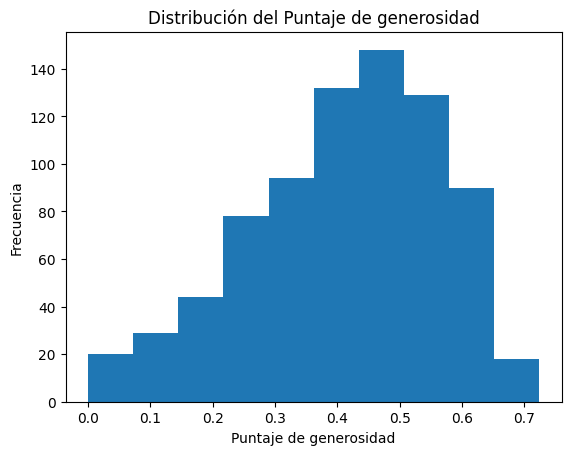

In [48]:

# Ejemplo de histograma
plt.hist(df['freedom'])
plt.xlabel('Puntaje de generosidad')
plt.ylabel('Frecuencia')
plt.title('Distribución del Puntaje de generosidad')
plt.show()

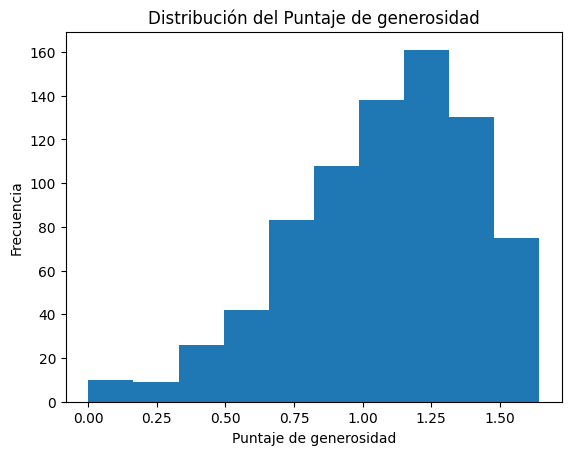

In [49]:
#
plt.hist(df['Social support'])
plt.xlabel('Puntaje de generosidad')
plt.ylabel('Frecuencia')
plt.title('Distribución del Puntaje de generosidad')
plt.show()

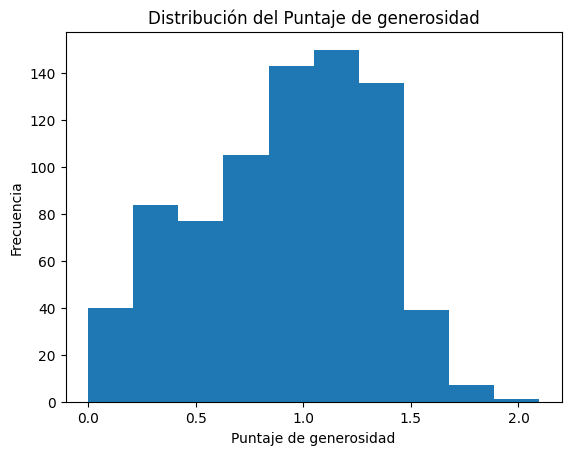

In [50]:
plt.hist(df['gdp'])
plt.xlabel('Puntaje de gdp')
plt.ylabel('Frecuencia')
plt.title('Distribución del Puntaje de gdp')
plt.show()

## Boxplots

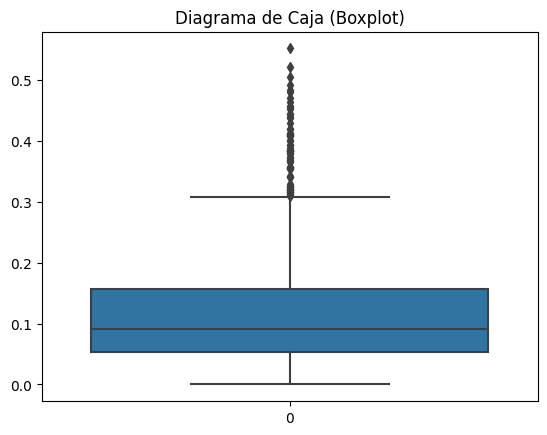

In [51]:

# Crear un boxplot con seaborn
sns.boxplot(df['corruption'])

# Agregar título
plt.title('Diagrama de Caja (Boxplot)')

# Mostrar el diagrama de caja
plt.show()

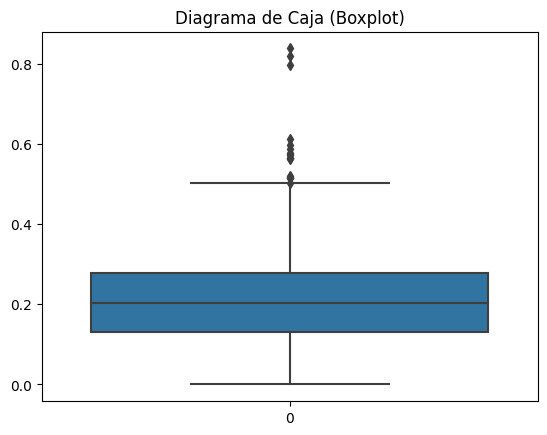

In [54]:
# Crear un boxplot
# Crear un boxplot con seaborn
sns.boxplot(df['generosity'])
# Agregar título
plt.title('Diagrama de Caja (Boxplot)')
# Mostrar el diagrama de caja
plt.show()

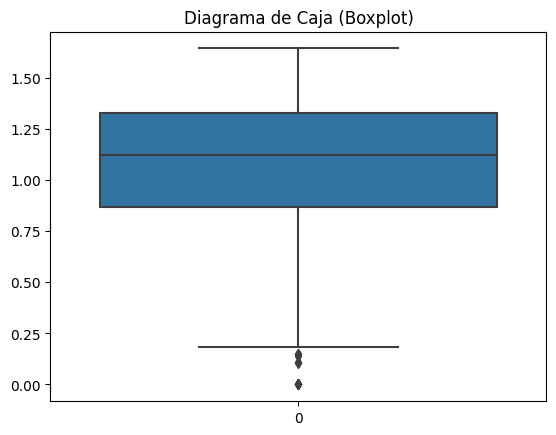

In [16]:
#Happiness Rank	score	gdp	Social support	healthy_life_expectancy	freedom	corruption	generosity
# Crear un boxplot con seaborn
sns.boxplot(df['Social support'])
# Agregar título
plt.title('Diagrama de Caja (Boxplot)')
# Mostrar el diagrama de caja
plt.show()

## Corplot Para Analizar las Correlaciones entre Las variables

C:\Users\Guatavo\AppData\Local\Temp\ipykernel_14896\1901838440.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


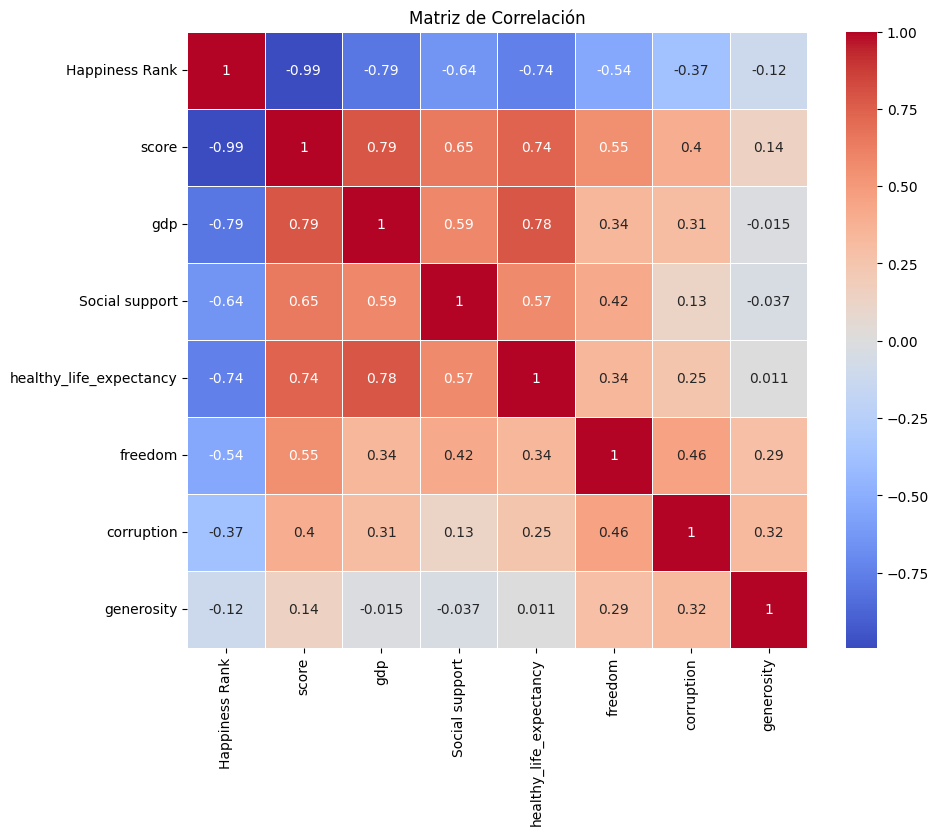

In [12]:
correlation_matrix = df.corr()

# Crea el gráfico de matriz de correlación (corrplot)
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura según tus preferencias
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

healthy_life_expectancy y gdp podiran tener multicolinealidad y posiblemente social support 

## Gdp y score

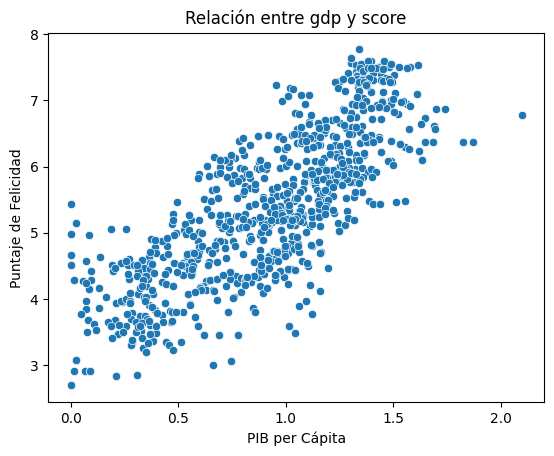

In [6]:
# Ejemplo de diagrama de dispersión
sns.scatterplot(x='gdp', y='score', data=df)
plt.xlabel('PIB per Cápita')
plt.ylabel('Puntaje de Felicidad')
plt.title('Relación entre gdp y score')
plt.show()


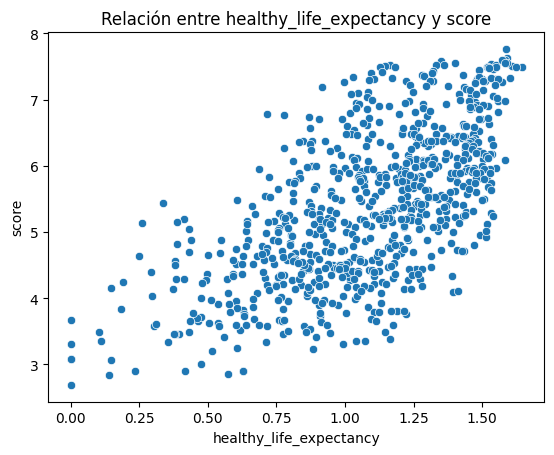

In [9]:

#Score=gdp(0.79)+Social support (0.65)+ Healthy life expectancy(0.74)+freedom(0.55)+corruption(0.4)
sns.scatterplot(x='Social support', y='score', data=df)
plt.xlabel('healthy_life_expectancy')
plt.ylabel('score')
plt.title('Relación entre healthy_life_expectancy y score')
plt.show()

se ve una leve correlacion positiva

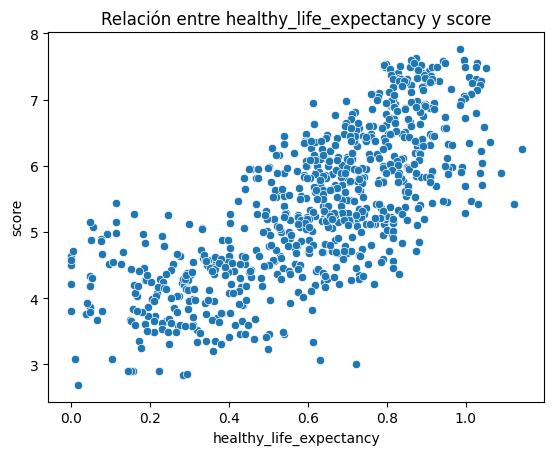

In [8]:

#Score=gdp(0.79)+Social support (0.65)+ Healthy life expectancy(0.74)+freedom(0.55)+corruption(0.4)
sns.scatterplot(x='healthy_life_expectancy', y='score', data=df)
plt.xlabel('healthy_life_expectancy')
plt.ylabel('score')
plt.title('Relación entre healthy_life_expectancy y score')
plt.show()

se ve una correlacion positiva

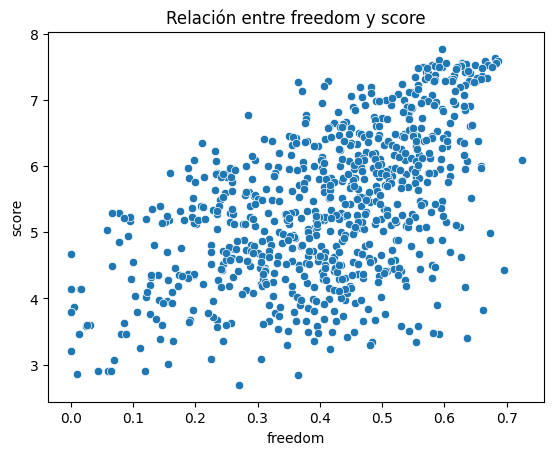

In [11]:

#Score=gdp(0.79)+Social support (0.65)+ Healthy life expectancy(0.74)+freedom(0.55)+corruption(0.4)
sns.scatterplot(x='freedom', y='score', data=df)
plt.xlabel('freedom')
plt.ylabel('score')
plt.title('Relación entre freedom y score')
plt.show()

se ve una leve correlacion positiva

## generosity y score

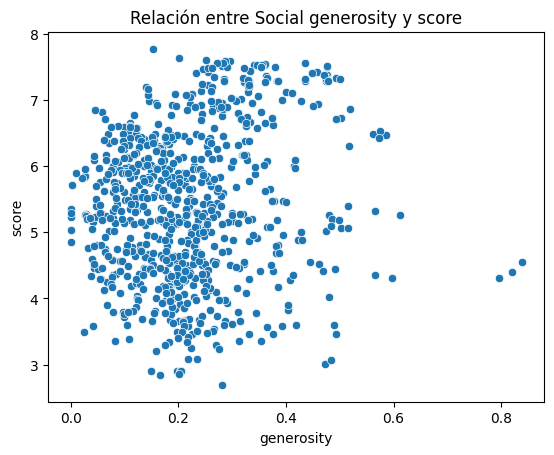

In [69]:
#Score=gdp(0.79)+Social support (0.65)+ Healthy life expectancy(0.74)+freedom(0.55)+corruption(0.4)
sns.scatterplot(x='generosity', y='score', data=df)
plt.xlabel('generosity')
plt.ylabel('score')
plt.title('Relación entre Social generosity y score')
plt.show()

Esto nos permite ver que no existe una correlacion clara, otra razon mas para no usarla en el modelo.

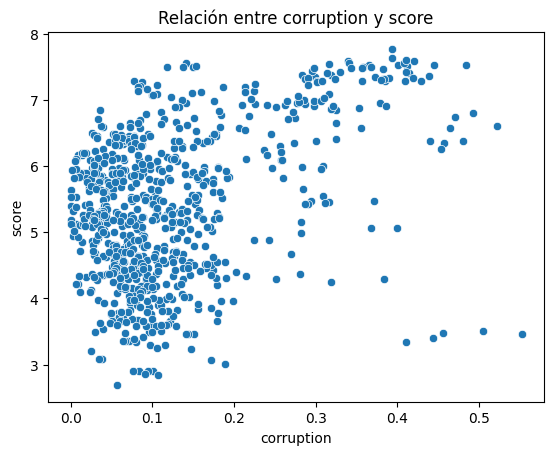

In [71]:
#Score=gdp(0.79)+Social support (0.65)+ Healthy life expectancy(0.74)+freedom(0.55)+corruption(0.4)
sns.scatterplot(x='corruption', y='score', data=df)
plt.xlabel('corruption')
plt.ylabel('score')
plt.title('Relación entre corruption y score')
plt.show()

Esto nos permite ver que no existe una correlacion clara, otra razon mas para no usarla en el modelo.

### Creando el modelo

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# Seleccionar las características relevantes (como se hizo en el paso anterior)
# Supongamos que 'gdp', 'social_support', 'healthy_life_expectancy', 'freedom', 'corruption', y 'generosity' son características relevantes.
#gpd,Social support,healthy_life_expectancy,freedom,corruption(probablemente)
#features2 = ['gdp', 'Social support', 'healthy_life_expectancy', 'freedom', 'corruption', 'generosity']
features = ['gdp', 'Social support', 'healthy_life_expectancy','freedom']
#### Hay que arreglar Social support por social_support

X = df[features]
y = df['score']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

#cambiarle el 42

In [34]:
# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

###hastq aqui

# Realizar predicciones en el conjunto de prueba
#y_pred = model.predict(X_test)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)
# Calcular métricas de rendimiento
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = metrics.r2_score(y_test, y_pred)

# Imprimir métricas de rendimiento
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.4393438338623484
Mean Squared Error: 0.31794905051040345
Root Mean Squared Error: 0.5638697105807364
R-squared: 0.7360936945098331


unimos los tests para poderlos streamear

In [23]:
# Unir X_test y y_test en un solo DataFrame
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,gdp,Social support,healthy_life_expectancy,freedom,corruption,generosity,score
224,1.06688,0.950760,0.523040,0.406720,0.103390,0.170870,5.615
711,0.55100,1.438000,0.723000,0.508000,0.023000,0.300000,5.261
180,1.40283,1.086720,0.809910,0.500360,0.273990,0.501560,6.725
434,1.00985,1.259976,0.625131,0.561213,0.073654,0.490864,4.440
522,1.14800,1.454000,0.671000,0.363000,0.066000,0.092000,5.933
...,...,...,...,...,...,...,...
108,0.39753,0.431060,0.601640,0.408200,0.125690,0.212220,4.694
293,0.34097,0.295610,0.274940,0.120720,0.144760,0.479580,4.028
583,0.68200,0.811000,0.343000,0.514000,0.077000,0.091000,4.559
713,1.00200,1.160000,0.785000,0.086000,0.114000,0.073000,5.211


In [24]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data

,gdp,Social support,healthy_life_expectancy,freedom,corruption,generosity,score
540,0.775000,1.312000,0.513000,0.643000,0.105000,0.120000,5.524
608,0.259000,0.474000,0.253000,0.434000,0.101000,0.158000,3.999
594,0.562000,1.047000,0.295000,0.503000,0.082000,0.221000,4.377
407,0.022643,0.721151,0.113989,0.602127,0.282410,0.291631,5.151
159,1.527330,1.145240,0.863030,0.585570,0.412030,0.280830,7.509
...,...,...,...,...,...,...,...
145,0.285200,1.002680,0.382150,0.328780,0.057470,0.343770,3.781
764,0.275000,0.572000,0.410000,0.293000,0.085000,0.177000,4.085
140,0.211020,1.132990,0.338610,0.457270,0.072670,0.290660,3.931
501,1.649000,1.303000,0.748000,0.654000,0.171000,0.256000,6.374


### Export model

In [25]:
modelo_exportado = "model_final.pkl"

# Carga el modelo desde el archivo
model = joblib.dump(model,modelo_exportado)

Exportamos el modelo para poder usarlo al predecir cada vez que llegue un dato del producer

### Cargando Modelo

In [15]:
model=joblib.load(modelo_exportado)
model.predict(X_test)

array([4.51604592, 5.23451784, 4.60483093, 6.77116152, 6.64089545,
       5.54732729, 5.54645138, 5.67914105, 4.65283889, 4.73726793,
       5.76954772, 6.86818626, 5.21297501, 4.09628072, 4.01133456,
       4.6525278 , 6.37768423, 5.18880943, 4.29055259, 5.09408882,
       5.89824109, 5.82691996, 5.58347296, 6.03424598, 7.05850621,
       3.72316951, 5.61888621, 5.21647387, 5.16355205, 5.68895735,
       3.85701432, 5.04904836, 4.18088489, 4.38890699, 5.93455564,
       4.10274299, 5.30631269, 6.18968739, 7.28207891, 4.96504491,
       7.37473252, 4.74458274, 4.16405666, 6.30505402, 5.61082776,
       5.07704478, 5.73566204, 5.06295767, 4.36327818, 6.35749087,
       7.09404846, 6.4011325 , 5.86048628, 6.90728169, 5.68082189,
       6.98093517, 6.30927524, 4.10039209, 6.53524168, 5.05836922,
       5.08912909, 5.92726892, 3.4219153 , 6.04410626, 6.27669488,
       6.15968899, 4.05187992, 3.35041041, 7.1039377 , 7.47540064,
       4.46802811, 6.43657757, 4.50545276, 5.10404387, 7.16311

In [14]:
##Trayendo los datos de la bd

In [29]:
# Configura la conexión a la base de datos PostgreSQL
connection = psycopg2.connect(
    host="localhost",
    port="5435",
    database="postgres",
    user="postgres",
    password="mysecretpass"
)

# Crea un cursor para ejecutar consultas
cursor = connection.cursor()

# Realiza una consulta SQL para obtener todos los datos de la tabla
query = "SELECT * FROM prediction_table"
cursor.execute(query)

# Obtén todos los resultados como una lista de tuplas
data = cursor.fetchall()

# Obtén los nombres de las columnas
column_names = [desc[0] for desc in cursor.description]

# Crea un DataFrame de pandas con los datos y nombres de columnas
df = pd.DataFrame(data, columns=column_names)

print(df)

# Cierra el cursor y la conexión a la base de datos
cursor.close()
connection.close()

         gdp  social_support  healthy_life_expectancy   freedom  corruption  \
0    1.06688        0.950760                 0.523040  0.406720    0.103390   
1    0.55100        1.438000                 0.723000  0.508000    0.023000   
2    1.40283        1.086720                 0.809910  0.500360    0.273990   
3    1.00985        1.259976                 0.625131  0.561213    0.073654   
4    1.14800        1.454000                 0.671000  0.363000    0.066000   
..       ...             ...                      ...       ...         ...   
465  0.39753        0.431060                 0.601640  0.408200    0.125690   
466  0.34097        0.295610                 0.274940  0.120720    0.144760   
467  0.68200        0.811000                 0.343000  0.514000    0.077000   
468  1.00200        1.160000                 0.785000  0.086000    0.114000   
469  0.71206        1.072840                 0.075660  0.306580    0.030600   

     generosity  score  prediction  
0      0.17087

podemos ver que leemos los datos almaenados en la base de datos, con la columna de prediccion